In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.dates as mdates
sb.set() # set the default Seaborn style for graphics

In [3]:
# importing the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

# Taking a quick look at the dataset(calender)
calendar.head()
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [4]:
# Taking a quick look at the dataset(listings)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# Setting up our variables
original_prices = pd.DataFrame(listings[['id','price']])
adjusted_prices = pd.DataFrame(calendar[['listing_id','date','available','price']])

# function to process and convert string into float for prices
def replace(s):
    for ch in ['$',',','-']:
        s = s.map(lambda x: x.replace(ch, ''))
    return s

# Converting the original prices of BNB to float
# Removing the symbols with replace function to allow for dtype conversion
original_prices[['price']] = original_prices[['price']].apply(replace).astype(float)

# Replacing the missing data (NaN) with '0'
# Removing the symbols with replace function to allow for dtype conversion
adjusted_prices[['price']] = adjusted_prices[['price']].replace(np.NaN,'0')
adjusted_prices[['price']] = adjusted_prices[['price']].apply(replace).astype(float)

# Removing the '-' in the dates
adjusted_prices[['date']] = adjusted_prices[['date']].apply(replace)

In [6]:
# Converting the date objects to datetime objects
adjusted_prices['date'] = pd.to_datetime(adjusted_prices.date)
date = pd.DataFrame(adjusted_prices['date'])

# Check data types of adjusted_prices
adjusted_prices.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [7]:
#month/date/year
cutoff = pd.to_datetime('2/1/2016')
print(cutoff)

2016-02-01 00:00:00


In [8]:
# Table is in year/month/date
Jan = adjusted_prices.loc[adjusted_prices.date < cutoff, :]
availibility = pd.DataFrame(Jan['available'])

# Peek into dataset Jan
Jan.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [9]:
adjusted_prices['Month'] = adjusted_prices.date.dt.month

# Peek into adjusted_prices
adjusted_prices.head()

,listing_id,date,available,price,Month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,0.0,1
3,241032,2016-01-07,f,0.0,1
4,241032,2016-01-08,f,0.0,1


In [10]:
# Setting up the Y variable (Train + Test)
y_variable_train = pd.DataFrame(columns = [])          #Dependent variable
y_variable_test = pd.DataFrame(columns = [])

# Setting up the X variable (Train + Test)
unavailablebnb_train = pd.DataFrame(columns = [])      #Independent variable
unavailablebnb_test = pd.DataFrame(columns = [])

# Randomly split the dataset into train and test cases (80/20 split)
from sklearn.model_selection import train_test_split
adjusted_prices_train, adjusted_prices_test = train_test_split(adjusted_prices, test_size = 0.2)

In [11]:
# compile the data into days 
# create a new dataframe recording the number of available bnbs on each day
DateDataset=pd.DataFrame()
DateDataset['date'] = pd.date_range(start='1/4/2016', periods=365, freq='D')

# Peek into DateDataset
DateDataset

,date
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08
...,...
360,2016-12-29
361,2016-12-30
362,2016-12-31
363,2017-01-01


In [12]:
#create a dataset for Jan
m=1
y=2016
for d in range(4,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d-4,'available']=count_t
    DateDataset.at[d-4,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d-4,'average price']=average_price

In [13]:
DateDataset

,date,available,unavailable,average price
0,2016-01-04,1401.0,1671.0,120.614561
1,2016-01-05,1508.0,1534.0,120.488727
2,2016-01-06,1491.0,1621.0,121.654594
3,2016-01-07,1430.0,1637.0,119.837063
4,2016-01-08,1404.0,1637.0,127.577635
...,...,...,...,...
360,2016-12-29,NaN,NaN,NaN
361,2016-12-30,NaN,NaN,NaN
362,2016-12-31,NaN,NaN,NaN
363,2017-01-01,NaN,NaN,NaN


In [14]:
# add Feb
m=2
y=2016
for d in range(1,30):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+27,'available']=count_t
    DateDataset.at[d+27,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+27,'average price']=average_price

In [15]:
# add Mar
m=3
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+56,'available']=count_t
    DateDataset.at[d+56,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+56,'average price']=average_price

In [16]:
# add Apr
m=4
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+87,'available']=count_t
    DateDataset.at[d+87,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+87,'average price']=average_price

In [17]:
# add May
m=5
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+117,'available']=count_t
    DateDataset.at[d+117,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+117,'average price']=average_price

In [18]:
# add Jun
m=6
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+148,'available']=count_t
    DateDataset.at[d+148,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+148,'average price']=average_price

In [19]:
# add Jul
m=7
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+178,'available']=count_t
    DateDataset.at[d+178,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+178,'average price']=average_price

In [20]:
# add Aug
m=8
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+209,'available']=count_t
    DateDataset.at[d+209,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+209,'average price']=average_price

In [21]:
# add sep
m=9
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+240,'available']=count_t
    DateDataset.at[d+240,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+240,'average price']=average_price

In [22]:
# add Oct
m=10
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+270,'available']=count_t
    DateDataset.at[d+270,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+270,'average price']=average_price

In [23]:
# add Nov
m=11
y=2016
for d in range(1,31):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+301,'available']=count_t
    DateDataset.at[d+301,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+301,'average price']=average_price

In [24]:
# add Dec
m=12
y=2016
for d in range(1,32):
    date=str(m)+'/'+str(d)+'/'+str(y)
    abc = adjusted_prices_train.loc[lambda df: adjusted_prices_train['date'] == pd.to_datetime(date)]
    abc_list=abc['available'].values.tolist()
    count_t=0
    for item in abc_list:
        if item == 't':
            count_t=count_t+1
    DateDataset.at[d+331,'available']=count_t
    DateDataset.at[d+331,'unavailable']=abc.shape[0]-count_t
    total_price=abc['price'].sum()
    average_price=total_price/count_t
    DateDataset.at[d+331,'average price']=average_price

In [25]:
DateDataset

,date,available,unavailable,average price
0,2016-01-04,1401.0,1671.0,120.614561
1,2016-01-05,1508.0,1534.0,120.488727
2,2016-01-06,1491.0,1621.0,121.654594
3,2016-01-07,1430.0,1637.0,119.837063
4,2016-01-08,1404.0,1637.0,127.577635
...,...,...,...,...
360,2016-12-29,2325.0,790.0,137.023226
361,2016-12-30,2265.0,785.0,146.866225
362,2016-12-31,2270.0,767.0,145.807489
363,2017-01-01,NaN,NaN,NaN


In [26]:
DateDataset = DateDataset.drop([363 , 364])
DateDataset

,date,available,unavailable,average price
0,2016-01-04,1401.0,1671.0,120.614561
1,2016-01-05,1508.0,1534.0,120.488727
2,2016-01-06,1491.0,1621.0,121.654594
3,2016-01-07,1430.0,1637.0,119.837063
4,2016-01-08,1404.0,1637.0,127.577635
...,...,...,...,...
358,2016-12-27,2259.0,792.0,137.402833
359,2016-12-28,2259.0,814.0,137.198761
360,2016-12-29,2325.0,790.0,137.023226
361,2016-12-30,2265.0,785.0,146.866225


In [27]:
# To get the average price of the bnbs
averageallbnb = (original_prices['price'].sum())/original_prices.shape[0]
print(averageallbnb)

127.97616553169199


In [28]:
# Converting the average price to average percentage price change
DateDataset['average price'] = (DateDataset['average price']-averageallbnb)/averageallbnb

In [29]:
# Convert column name
DateDataset = DateDataset.rename(columns={'average price':'price change'})
DateDataset

,date,available,unavailable,price change
0,2016-01-04,1401.0,1671.0,-0.057523
1,2016-01-05,1508.0,1534.0,-0.058507
2,2016-01-06,1491.0,1621.0,-0.049396
3,2016-01-07,1430.0,1637.0,-0.063599
4,2016-01-08,1404.0,1637.0,-0.003114
...,...,...,...,...
358,2016-12-27,2259.0,792.0,0.073660
359,2016-12-28,2259.0,814.0,0.072065
360,2016-12-29,2325.0,790.0,0.070693
361,2016-12-30,2265.0,785.0,0.147606


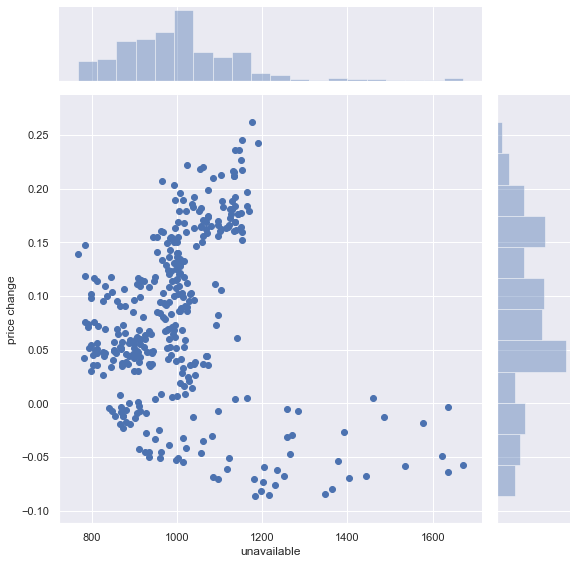

In [30]:
sb.jointplot(DateDataset['unavailable'], DateDataset['price change'], height = 8)

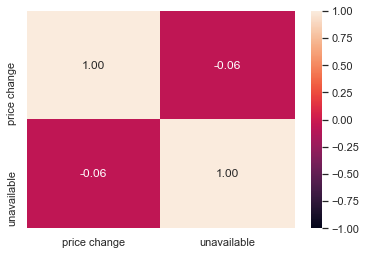

In [42]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([DateDataset['price change'], DateDataset['unavailable'].reindex(index=DateDataset['price change'].index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [54]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(DateDataset[['unavailable']])

model = LinearRegression()
model.fit(x_poly, DateDataset['price change'])
y_poly_pred = model.predict(x_poly)
                   
rmse = np.sqrt(mean_squared_error(DateDataset['price change'],y_poly_pred))
r2 = r2_score(DateDataset['price change'],y_poly_pred)
print(rmse)
print(r2)

0.05177063484152739
0.5660298065887965


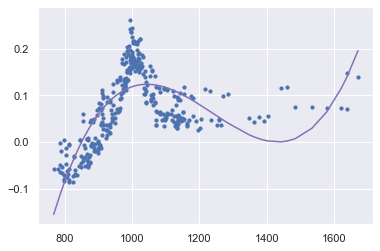

In [55]:
plt.scatter(DateDataset['unavailable'], DateDataset['price change'], s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(DateDataset['unavailable'],y_poly_pred), key=sort_axis)
DateDataset['unavailable'], y_poly_pred = zip(*sorted_zip)
plt.plot(DateDataset['unavailable'], y_poly_pred, color='m')
plt.show()